  ## Applying Functions to Data

  Data visualization is often the first step on the statistical journey to explore a research question. However, this is usually not where the journey stops, instead additional analyses are often performed to learn more about the average trends seen in the data. These can often be split into two broad categories,

  1. Descriptive Statistics
  2. Inferential Statistics


  **Descriptive Statistics** help to describe the data and are particularly useful to give a single numeric summary for a single variable. We will explore this idea more fully in this section.


  **Inferential Statistics** help us to make broader statements from the data we have to the larger group of interest, commonly referred to as the population. More details on these steps later in the course.

  ## Setup

  We are going to use some real data about higher education institutions from the college scorecard (https://collegescorecard.ed.gov/) to explore the types of conclusions we can make from the data. The college scorecard releases data on higher education institutions to help make the institutions more transparent and provide a place for parents, students, educators, etc can get information about specific instituations from a third party (i.e. US Department of Education).

  ### Loading R packages

In [7]:
library(tidyverse)
library(ggformula)
library(mosaic)

theme_set(theme_bw(base_size = 16))

  ### Read in Data

  The code below will read in the data for us to use in the future. The R function to read in the data is `read_csv()`. Function arguments are passed within the parentheses and for the `read_csv()` function the first argument is the path to the data. The data for this example are posted on GitHub in a comma separated file. This means the data is stored in a text format and each variable (i.e. column in the data) is separated by a comma. This is a common format data is stored.

  The data is stored to an object named `college_score`. In R (and other statistical programming languages), it is common to use objects to store results to use later. In this instance, we would like to read in the data and store it to use it later. For example, we will likely want to explore the data visually to see if we can extract some trends from the data. The assignment to an object in R is done with the `<-` assignment operator. Finally, there is one additional argument, `guess_max` which helps to ensure that the data are read in appropriately. More on this later.

In [8]:
college_score <- read_csv("https://raw.githubusercontent.com/lebebr01/statthink/master/data-raw/College-scorecard-4143.csv", guess_max = 10000)
head(college_score)

Rows: 7058 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): instnm, city, stabbr, preddeg, region, locale
dbl (10): adm_rate, actcmmid, ugds, costt4_a, costt4_p, tuitionfee_in, tuiti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


instnm,city,stabbr,preddeg,region,locale,adm_rate,actcmmid,ugds,costt4_a,costt4_p,tuitionfee_in,tuitionfee_out,debt_mdn,grad_debt_mdn,female
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama A & M University,Normal,AL,Bachelor Degree,Southeast,City: Midsize,0.9027,18,4824,22886,NA,9857,18236,13246.0,32750,0.5640301
University of Alabama at Birmingham,Birmingham,AL,Bachelor Degree,Southeast,City: Midsize,0.9181,25,12866,24129,NA,8328,19032,14979.5,21833,0.6390907
Amridge University,Montgomery,AL,Bachelor Degree,Southeast,City: Midsize,NA,NA,322,15080,NA,6900,6900,10430.0,22890,0.6486486
University of Alabama in Huntsville,Huntsville,AL,Bachelor Degree,Southeast,City: Midsize,0.8123,28,6917,22108,NA,10280,21480,13522.0,22647,0.4763499
Alabama State University,Montgomery,AL,Bachelor Degree,Southeast,City: Midsize,0.9787,18,4189,19413,NA,11068,19396,15738.0,31500,0.6134185
The University of Alabama,Tuscaloosa,AL,Bachelor Degree,Southeast,City: Midsize,0.5330,28,32387,28836,NA,10780,28100,17340.0,23290,0.6152524


  ## Functions to columns of data

  Data are often stored in a tabular format where the rows of the data are the units and the columns in a data frame are the variables. This is shown in the college scorecard data above where the rows of the data are specific institutions of higher education and the columns represent various attributes about those higher education institutions. This is a common structure to store data where each row represents a unique unit or measurement occasion for longitudinal data.

  In the data visualization units, we accessed columns of data to view the distribution of the particular variable. For example, we explore histograms of admission rate. Instead of visualizing the data, now we will apply functions to these columns to calculate statistics of interest. In particular, the focus will be on the calculating statistics for variables that are numeric rather than representing categories. We will discuss this in more detail as we move along.

  Let's keep talking about the admission rate as we have explored that visually already and start with an example.

In [9]:
df_stats(~ adm_rate, data = college_score, median)

Warning message:
“Excluding 5039 rows due to missing data [df_stats()].”


response,median
<chr>,<dbl>
adm_rate,0.7077


There is an alternative way to write the following code that uses a pipe operator (i.e., `|>`) which removes the data from the `df_stats()` function, this can make the function a bit easier to read. The following is equivalent code:

In [10]:
college_score |>
  df_stats(~ adm_rate, median)

Warning message:
“Excluding 5039 rows due to missing data [df_stats()].”


response,median
<chr>,<dbl>
adm_rate,0.7077


  The `df_stats()` function takes a formula syntax that is similar to the syntax used for viewing a univariate distribution you saw earlier. In particular, the variable that we wish to compute a statistic on is specified after the `~`. The next argument is the data argument. Finally, subsequent arguments after the data argument are functions that we want to compute for the variable specified. Here, I compute the median which happens to be, 0.708. The median is also referred to as the 50% percentile and is the location where half of the data (in this case higher education institutions) are above and below an admission rate of 70.8%. The median is the value for the attribute of interest that splits the data in half, half are below the median value and have are above the median value. 

  Let's think where this shows up on the admission rate distribution we plotted earlier.

Warning message:
“Excluding 5039 rows due to missing data [df_stats()].”
Warning message:
“Removed 5039 rows containing non-finite values (stat_bin).”


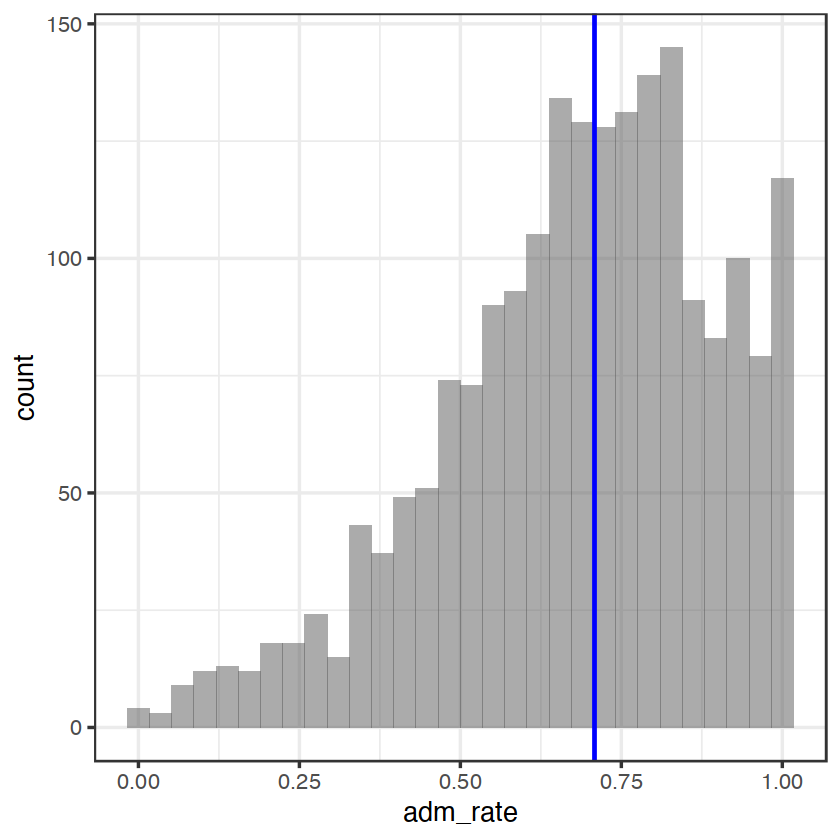

In [11]:
gf_histogram(~ adm_rate, data = college_score, bins = 30) |>
  gf_vline(color = 'blue', xintercept = ~df_stats(~ adm_rate, data = college_score, median)['median'][[1]], size = 1)

  You'll notice that the line is just to the left of the main peak of the data. Does it appear that half of the data are below and half are above the blue line in the figure?

  The median is a special percentile, being the same as the 50th percentile. However other percentiles may be of interest. For example, maybe we'd want to know what the 20th percentile is or the 80th percentile to apply to a school that isn't too selective or is not selective at all. We can compute these with the `df_stats()` function again. The code below computes the 20th, 50th and 80th percetiles for the admission rate attribute. 

In [12]:
q <- college_score |>
  df_stats(~ adm_rate, quantile(c(0.2, 0.5, 0.8)), nice_names = TRUE)
q

Warning message:
“Excluding 5039 rows due to missing data [df_stats()].”


response,X20.,X50.,X80.
<chr>,<dbl>,<dbl>,<dbl>
adm_rate,0.51428,0.7077,0.86932


  Let's look where these fall on our distribution.

Warning message:
“Removed 5039 rows containing non-finite values (stat_bin).”


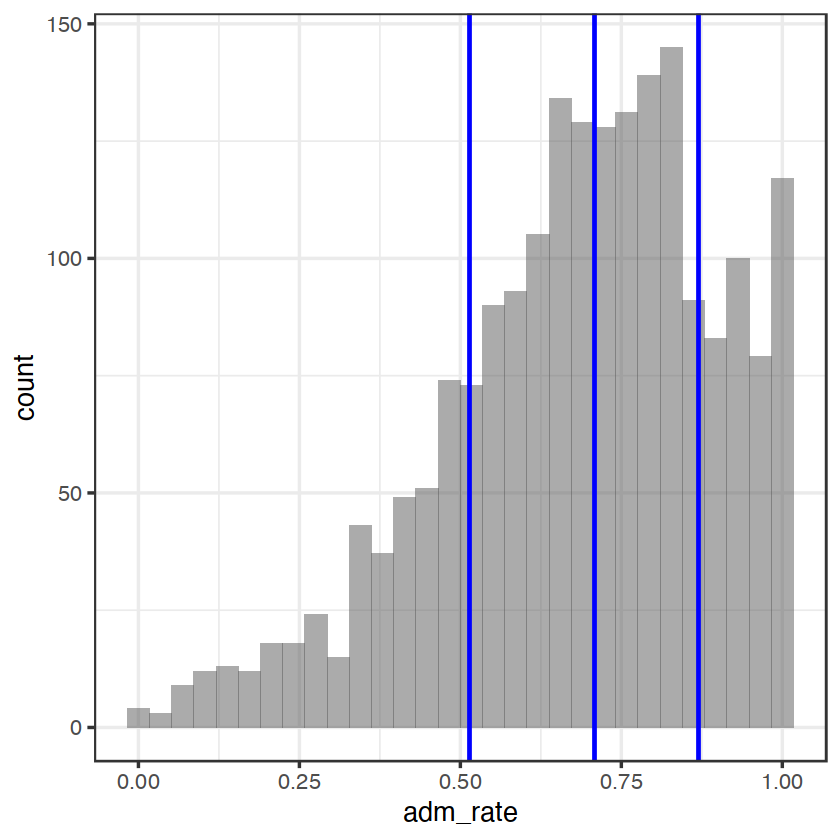

In [13]:
gf_histogram(~ adm_rate, data = college_score, bins = 30) |>
  gf_vline(color = 'blue', xintercept = ~ value, data = pivot_longer(q, cols = starts_with('X')), size = 1)

  Does it appear that 20% of the data are below the first line and 20% are above the last line? Difficult to view on the histogram. An empirical distribution figure, sometimes called an ogive, can be helpful to show these.

Warning message:
“Removed 5039 rows containing non-finite values (stat_ecdf).”


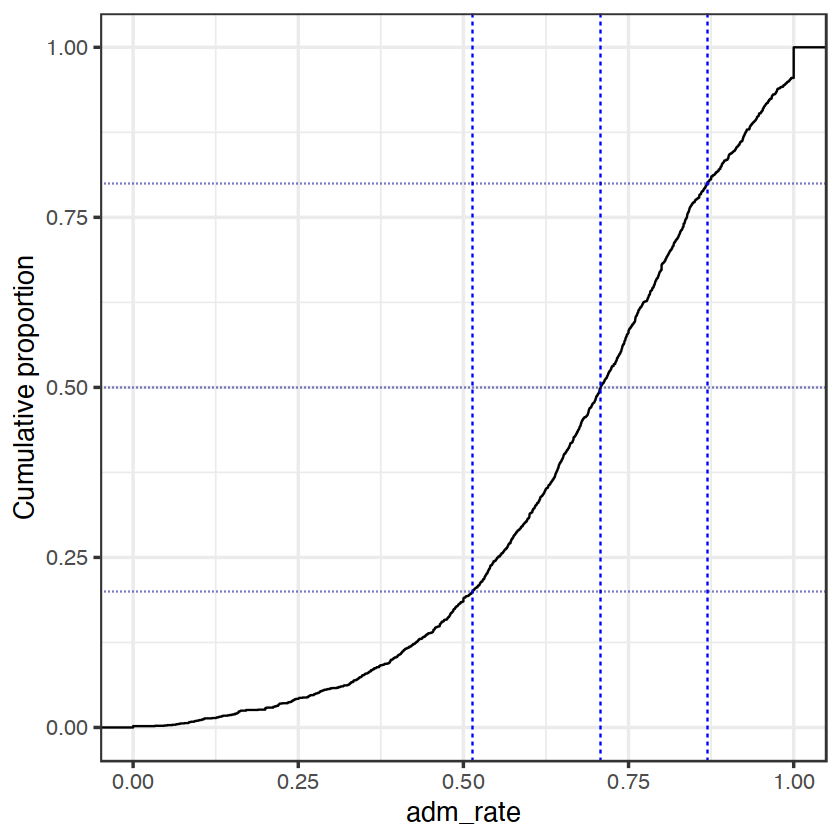

In [14]:
gf_ecdf(~ adm_rate, data = college_score) |>
  gf_vline(color = 'blue', xintercept = ~ value, data = pivot_longer(q, cols = starts_with('X')), linetype = 2) |>
  gf_hline(color = 'darkblue', yintercept = ~c(0.2, 0.5, 0.8), data = NA, linetype = 3) |>
  gf_labs(y = 'Cumulative proportion')

  Here you can see that the horizontal lines cross over the vertical lines at the specified values (i.e. 20% for the first vertical line, 50% for the second vertical line, 80% for the final vertical line).

   ## Measures of Variation

   So far we have focused primarily on applying functions to columns of data to provide a single numeric summary for where the center of the distribution may lie. The center of the distribution is important, however the primary goal in research and with statistics is to try to understand the variation in the distribution.

   One crude measure of variation that is intuitive is the range of a variable. The range is the difference between the smallest and the largest number in the data. We can compute this with the `df_stats()` function.

In [15]:
college_score |>
  df_stats(~ adm_rate, range)

Warning message:
“Excluding 5039 rows due to missing data [df_stats()].”


response,range_1,range_2
<chr>,<dbl>,<dbl>
adm_rate,0,1


   The details of the `df_stats()` function are in the previous course notes. The output for this computation returns two values, the minimum and maximum value in the data and unsurprisingly, is 0 and 1 respectively. The range is most useful as a data checking process to ensure that the variable contains values that are theoretically possible, which is true in this case. The range is known as a biased statistic in that it will almost always be smaller than the population value. Therefore, we would like a better statistic for measures of variation.

   ### Robust measure of variation
   A robust measure of variation that often is used in tandem with the median is the interquartile range (IQR). This statistic can be calculated in two ways, either using the `IQR()` or `quantile()` function. Both are presented below.

In [16]:
college_score |>
  df_stats(~ adm_rate, IQR, quantile(c(0.25, 0.75)), nice_names = TRUE)

Warning message:
“Excluding 5039 rows due to missing data [df_stats()].”


response,IQR,X25.,X75.
<chr>,<dbl>,<dbl>,<dbl>
adm_rate,0.28575,0.5524,0.83815


   The IQR is the difference between the 75th and 25th percentiles and in this example equals 0.285 or about 28.5%. As the IQR represents differences in percentiles, we could say that the middle 50% of the distribution is found between 55% and 84% and the middle 50% is spread out by about 28.5%. The idea behind the IQR representing differences in percentiles allows us to extend this to different percentiles that may be more directly interpretable for a given situation. For example, suppose we wanted to know how spread out the middle 80% of the distribution is. We can do this directly by computing the 90th and 10th percentiles and finding the difference between the two.

In [17]:
mid_80 <- college_score |>
  df_stats(~ adm_rate, quantile(c(0.1, 0.9)), nice_names = TRUE)
mid_80

Warning message:
“Excluding 5039 rows due to missing data [df_stats()].”


response,X10.,X90.
<chr>,<dbl>,<dbl>
adm_rate,0.39284,0.94706


   As you can see, once you extend the amount of the distribution contained, the distance increases, now to 0.555 or 55.5% the the range of the middle 80% of the admission rate distribution. We can also visualize what this looks like.

Warning message:
“Removed 5039 rows containing non-finite values (stat_bin).”


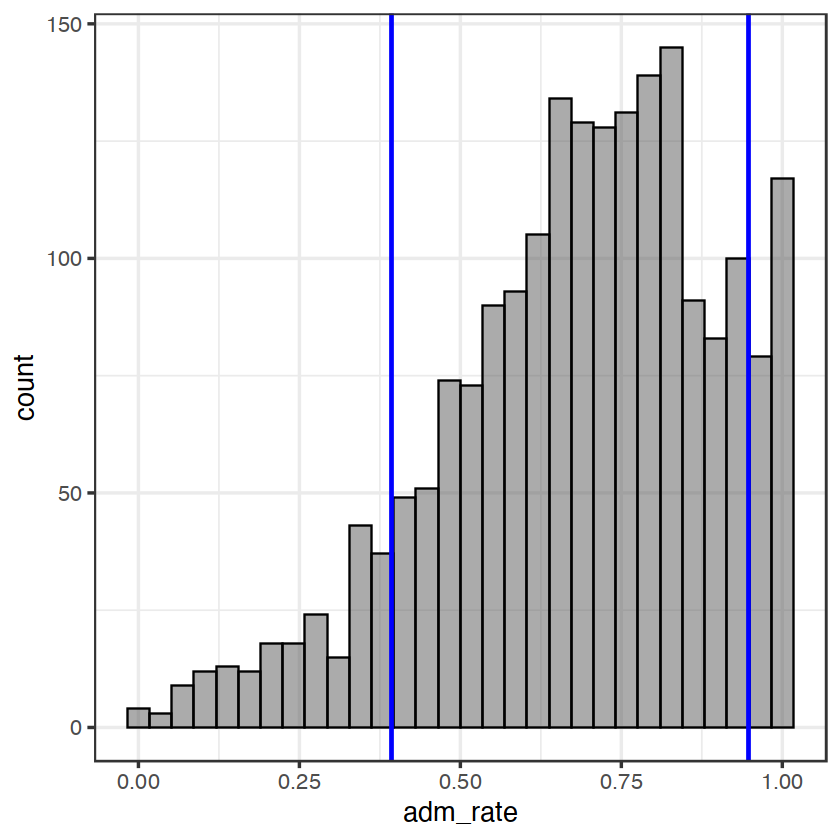

In [18]:
gf_histogram(~ adm_rate, data = college_score, bins = 30, color = 'black') %>%
  gf_vline(color = 'blue', xintercept = ~ value, data = pivot_longer(mid_80, cols = starts_with('X')), size = 1)

   We can also view the exact percentages using the empirical cumulative density function.

Warning message:
“Removed 5039 rows containing non-finite values (stat_ecdf).”


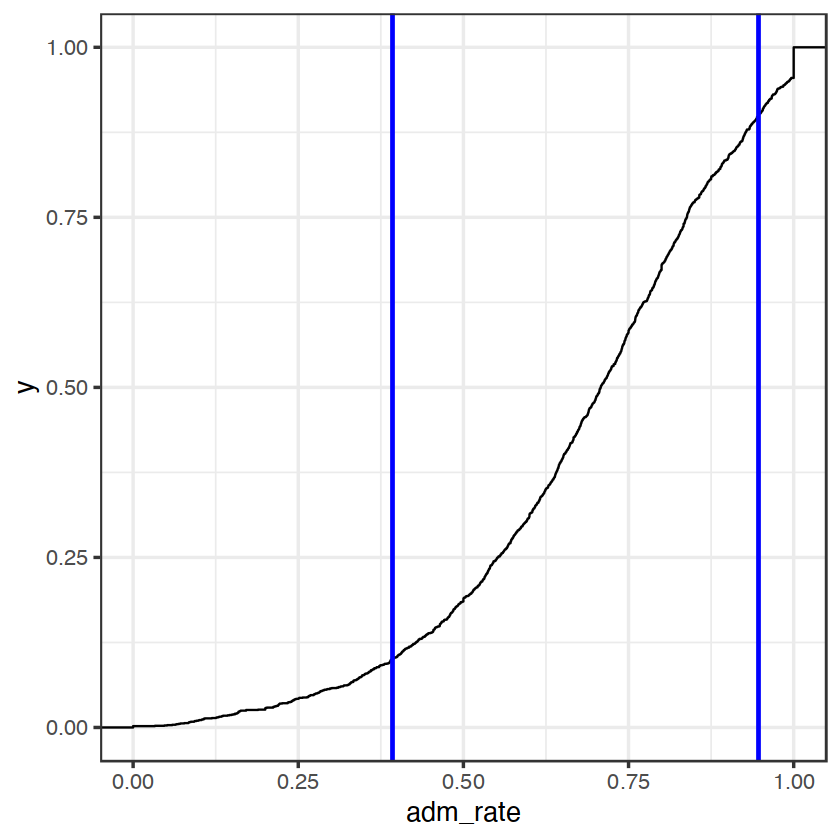

In [20]:
gf_ecdf(~ adm_rate, data = college_score) |>
  gf_vline(color = 'blue', xintercept = ~ value, data = pivot_longer(mid_80, cols = starts_with('X')), size = 1)
